In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.datasets import mnist

### The MNIST digit classifier model

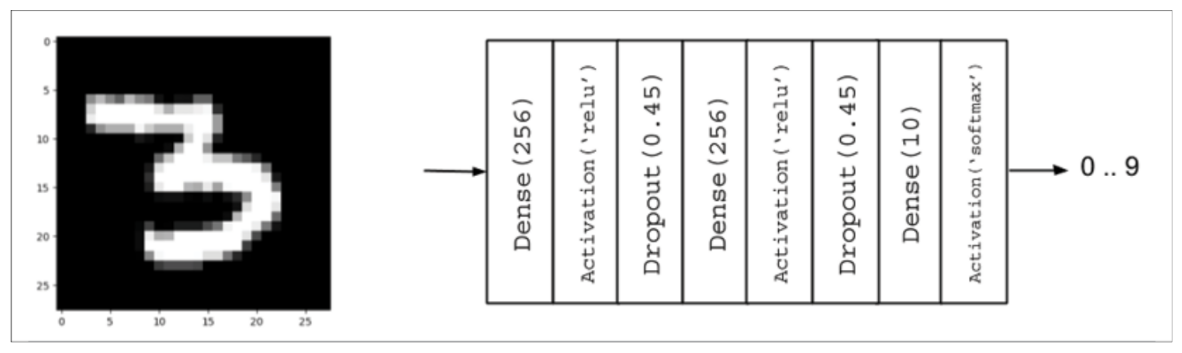

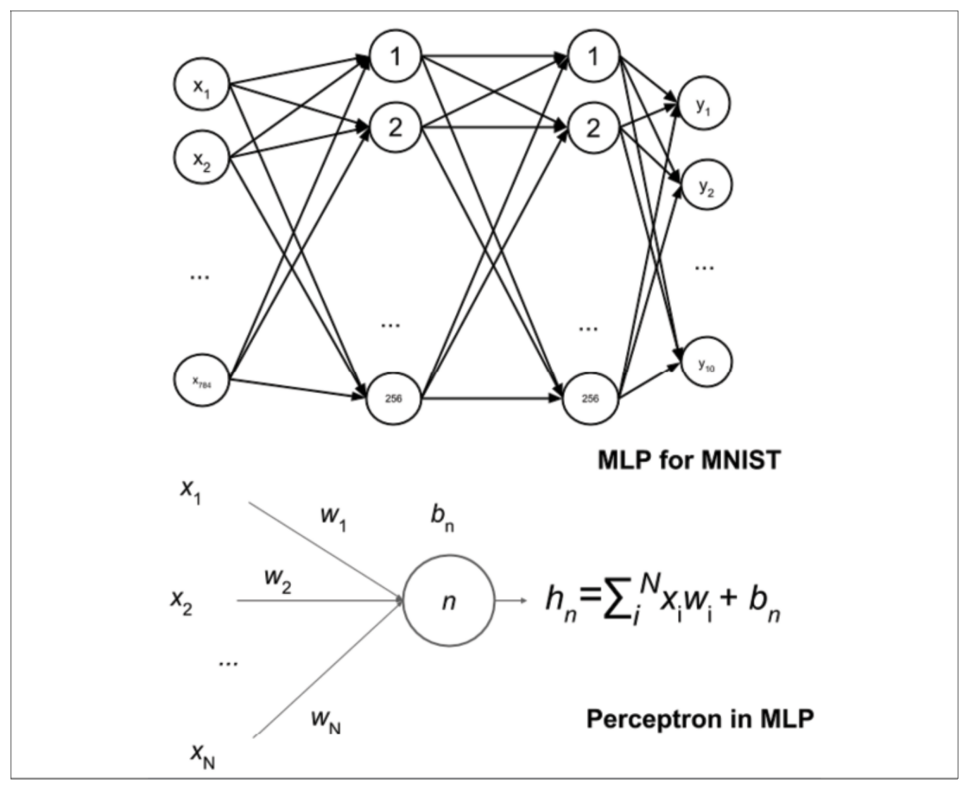

In [2]:
# The proposed MLP model shown in the first below figure can be used for MNIST digit classification.
# When the units or perceptrons are exposed, the MLP model is a fully connected network, as shown in the 
# second below figure. 
# We'll also show how the output of the perceptron is computed from inputs as a function of weights, wi,
# bias, bn, for the n-th unit.

plt.figure(figsize=(15, 6))
image_mp = mpimg.imread("../Image/MLP_MNIST_Classifier_1.png", "png")
plt.imshow(image_mp)
plt.axis("off")

plt.figure(figsize=(15, 10))
image_mp = mpimg.imread("../Image/MLP_MNIST_Classifier_2.png", "png")
plt.imshow(image_mp)
plt.axis("off")
plt.show()

### mlp-mnist model

In [3]:
# load mnist dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#compute the number of labels
kind_labels = np.unique(y_train)
num_labels = len(np.unique(kind_labels))
print(f"label은 {kind_labels}로서 총 {num_labels}종류이다.")

label은 [0 1 2 3 4 5 6 7 8 9]로서 총 10종류이다.


In [4]:
for i in y_train[:2]:
    print(i, end=', ')
print()
    
# convert to one-hot vector
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

for i in y_train[:2]:
    print(i, end=', ')

5, 0, 
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.], [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.], 

In [5]:
# image dimensions(assumed square)
image_size = x_train.shape[1]
input_size = image_size * image_size
print(f"input size는 {input_size}이다.")

input size는 784이다.


In [6]:
# resize and normalize
x_train = x_train.reshape(-1, input_size)    # (60000, 28, 28) ==> (60000, 784)
x_train = x_train.astype('float32') / 255
print(f"x_train의 shape은 {x_train.shape}이고 data type은 {x_train.dtype}이다.")

x_test = x_test.reshape(-1, input_size)
x_test = x_test.astype('float32') / 255
print(f"x_test의 shape은 {x_test.shape}이고 data type은 {x_test.dtype}이다.")

x_train의 shape은 (60000, 784)이고 data type은 float32이다.
x_test의 shape은 (10000, 784)이고 data type은 float32이다.


In [7]:
# network parameters
batch_size = 128
hidden_units = 256
dropout = 0.45

In [8]:
# model is a 3-layer MLP with ReLU and dropout after each layer
model = Sequential()

model.add(Dense(hidden_units, input_dim=input_size))
model.add(Activation('relu'))
model.add(Dropout(dropout))

model.add(Dense(hidden_units))
model.add(Activation('relu'))
model.add(Dropout(dropout))

model.add(Dense(num_labels))
model.add(Activation('softmax'))     # this is the output for one-hot vector

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 activation (Activation)     (None, 256)               0         
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 activation_1 (Activation)   (None, 256)               0         
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                2

In [14]:
# Calculate the number of parameters for each layer

# 첫번째 Dense layer : weights + biases = input_size * hidden_units + 1 * hidden_units
first_layer_params = input_size * hidden_units + 1 * hidden_units
print(first_layer_params)

# 두번째 Dense layer : weights + biases = hidden_units * hidden_units + 1 * hidden_units
middle_layer_params = hidden_units * hidden_units + 1 * hidden_units
print(middle_layer_params)

# 세번째 Dense layer : weights + biases = hidden_units * num_labels + 1 * num_labels
last_layer_params = hidden_units * num_labels + 1 * num_labels
print(last_layer_params)

# mlp-mnist model의 parameter 개수
total_num_params = first_layer_params + middle_layer_params + last_layer_params
print(f"모델의 parameter 총 개수는 {total_num_params}이다.")

200960
65792
2570
모델의 parameter 총 개수는 269322이다.


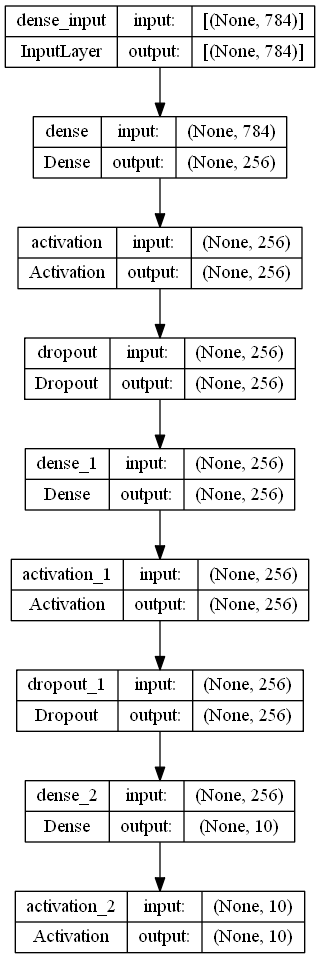

In [17]:
plot_model(model, to_file="../Image/mlp-mnist.png", show_shapes=True)

In [18]:
# loss function for one-hot vector
# use adam optimizer
# accuracy is good metric for classification tasks
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [19]:
# train the network
model.fit(x_train, y_train, epochs=20, batch_size=batch_size)

Epoch 1/20
469/469 [==============================] - 4s 3ms/step - loss: 0.4259 - accuracy: 0.8678
Epoch 2/20
469/469 [==============================] - 2s 3ms/step - loss: 0.1920 - accuracy: 0.9427
Epoch 3/20
469/469 [==============================] - 2s 3ms/step - loss: 0.1553 - accuracy: 0.9537
Epoch 4/20
469/469 [==============================] - 2s 4ms/step - loss: 0.1280 - accuracy: 0.9614
Epoch 5/20
469/469 [==============================] - 2s 4ms/step - loss: 0.1133 - accuracy: 0.9653
Epoch 6/20
469/469 [==============================] - 2s 4ms/step - loss: 0.1060 - accuracy: 0.9676
Epoch 7/20
469/469 [==============================] - 2s 3ms/step - loss: 0.0956 - accuracy: 0.9700
Epoch 8/20
469/469 [==============================] - 2s 3ms/step - loss: 0.0886 - accuracy: 0.9729
Epoch 9/20
469/469 [==============================] - 1s 3ms/step - loss: 0.0825 - accuracy: 0.9740
Epoch 10/20
469/469 [==============================] - 2s 3ms/step - loss: 0.0796 - accuracy: 0.9749

In [29]:
# validate the model on test dataset to determine generalization
loss, acc = model.evaluate(x_test, y_test, batch_size=batch_size, verbose=0)
print(f"\nTest loss : {loss:.4f}\nTest accuracy : {acc:.4f}")


Test loss : 0.0660
Test accuracy : 0.9817
